In [57]:
import pandas as pd

# Load the dataset to review its contents and structure
file_path = 'athletes_data.csv'
athletes_data = pd.read_csv(file_path)

# Display the first few rows of the dataset for inspection
athletes_data.head()



,Name,MainContent,BioMedals,BiographicalInformation,Milestones
0,ABREU Isabela,ABREU Isabela \nBrazil\nModern Pentathlon\nMod...,EVENTS AND MEDALS\nDiscipline\nEvent\nRank\nMe...,BIOGRAPHICAL INFORMATION\nHighlights:\nNote:\n...,MILESTONES\n2019 Pan American Games modern pen...
1,ADRIANA,ADRIANA \nBrazil\nFootball\nFootball\nDate of...,EVENTS AND MEDALS\nDiscipline\nEvent\nRank\nMe...,BIOGRAPHICAL INFORMATION\nHighlights:\nFIFA Wo...,MILESTONES\nNATIONAL TEAM\nCompeted in 2023 FI...
2,AGUIAR Mayra,AGUIAR Mayra \nBrazil\nJudo\nJudo\nDate of Bir...,EVENTS AND MEDALS\nDiscipline\nEvent\nRank\nMe...,BIOGRAPHICAL INFORMATION\nHighlights:\nOlympic...,MILESTONES\nThree-time Olympic Games bronze me...
3,AKIO Augusto,AKIO Augusto \nBrazil\nSkateboarding\nSkateboa...,EVENTS AND MEDALS\nDiscipline\nEvent\nRank\nMe...,BIOGRAPHICAL INFORMATION\nHighlights:\nWorld C...,MILESTONES\nSilver medallist at the 2022 World...
4,ALBIERO Nicolas,ALBIERO Nicolas \nBrazil\nSwimming\nSwimming\n...,EVENTS AND MEDALS\nDiscipline\nEvent\nRank\nMe...,BIOGRAPHICAL INFORMATION\nHighlights:\nNote:\n...,MILESTONES\nFirst-time Olympian.\n2017 World J...


In [59]:
import re

# Function to clean text data by removing unwanted characters, extra spaces, and line breaks
def clean_text(text):
    text = re.sub(r'\n+', ' ', text)  # Replace newlines with spaces
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^a-zA-Z0-9À-ÿ., ]+', '', text)  # Remove non-alphanumeric characters except periods and commas
    return text.strip()

# Applying the cleaning function to relevant columns
columns_to_clean = ['MainContent', 'BioMedals', 'BiographicalInformation', 'Milestones']
# Ensuring that all columns are strings by replacing any NaN values with an empty string
athletes_data[columns_to_clean] = athletes_data[columns_to_clean].fillna("")

# Reapplying the cleaning function to ensure all text is processed correctly
for column in columns_to_clean:
    athletes_data[column] = athletes_data[column].apply(clean_text)

athletes_data

,Name,MainContent,BioMedals,BiographicalInformation,Milestones
0,ABREU Isabela,ABREU Isabela Brazil Modern Pentathlon Modern ...,EVENTS AND MEDALS Discipline Event Rank Medal ...,BIOGRAPHICAL INFORMATION Highlights Note Resul...,MILESTONES 2019 Pan American Games modern pent...
1,ADRIANA,ADRIANA Brazil Football Football Date of Birth...,EVENTS AND MEDALS Discipline Event Rank Medal ...,BIOGRAPHICAL INFORMATION Highlights FIFA World...,MILESTONES NATIONAL TEAM Competed in 2023 FIFA...
2,AGUIAR Mayra,AGUIAR Mayra Brazil Judo Judo Date of Birth 3 ...,EVENTS AND MEDALS Discipline Event Rank Medal ...,BIOGRAPHICAL INFORMATION Highlights Olympic Ga...,MILESTONES Threetime Olympic Games bronze meda...
3,AKIO Augusto,AKIO Augusto Brazil Skateboarding Skateboardin...,EVENTS AND MEDALS Discipline Event Rank Medal ...,BIOGRAPHICAL INFORMATION Highlights World Cham...,MILESTONES Silver medallist at the 2022 World ...
4,ALBIERO Nicolas,ALBIERO Nicolas Brazil Swimming Swimming Date ...,EVENTS AND MEDALS Discipline Event Rank Medal ...,BIOGRAPHICAL INFORMATION Highlights Note Resul...,MILESTONES Firsttime Olympian. 2017 World Juni...
...,...,...,...,...,...
285,VIEIRA Samara,VIEIRA Samara Brazil Handball Handball Date of...,EVENTS AND MEDALS Discipline Event Rank Medal ...,BIOGRAPHICAL INFORMATION Highlights Olympic Ga...,MILESTONES Made her Olympic debut at Tokyo 202...
286,VILAR Lucas,VILAR Lucas Brazil Athletics Athletics Date of...,EVENTS AND MEDALS Discipline Event Rank Medal ...,BIOGRAPHICAL INFORMATION Highlights Olympic Ga...,MILESTONES Competed in the 200m heats at the T...
287,VITORIA YAYA,VITORIA YAYA Brazil Football Football Date of ...,EVENTS AND MEDALS Discipline Event Rank Medal ...,BIOGRAPHICAL INFORMATION Highlights Note Resul...,MILESTONES NATIONAL TEAM Won the CONCACAF Gold...
288,WESTON-WEBB Tatiana,WESTONWEBB Tatiana Brazil Surfing Surfing Date...,EVENTS AND MEDALS Discipline Event Rank Medal ...,BIOGRAPHICAL INFORMATION Highlights Olympic Ga...,MILESTONES Made her Olympic debut at Tokyo 202...


In [60]:
from sentence_transformers import SentenceTransformer
import torch

# Initialize the SBERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Combine the relevant columns for each athlete to create a single text input
athletes_data['combined_text'] = athletes_data['MainContent'] + " " + \
                                 athletes_data['BioMedals'] + " " + \
                                 athletes_data['BiographicalInformation'] + " " + \
                                 athletes_data['Milestones']

# Generate embeddings for each combined text using SBERT
embeddings = model.encode(athletes_data['combined_text'].tolist(), convert_to_tensor=True)


C:\Users\Rafael\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


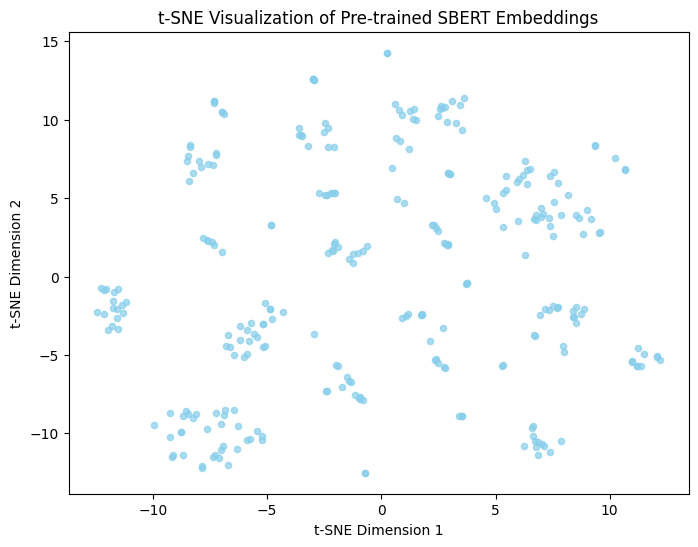

In [69]:
# Generate and visualize t-SNE for only the pre-trained embeddings
# Assuming `embeddings` contains the pre-trained SBERT embeddings

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Generate 2D t-SNE projection for pre-trained SBERT embeddings
pretrained_tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42).fit_transform(embeddings)

# Plot the t-SNE visualization
plt.figure(figsize=(8, 6))
plt.scatter(pretrained_tsne[:, 0], pretrained_tsne[:, 1], s=20, alpha=0.7, color='skyblue')
plt.title("t-SNE Visualization of Pre-trained SBERT Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


In [87]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define Autoencoder Model
class EmbeddingAutoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(EmbeddingAutoencoder, self).__init__()
        self.encoder = nn.Linear(input_dim, hidden_dim)
        self.decoder = nn.Linear(hidden_dim, input_dim)
        
    def forward(self, x):
        encoded = torch.relu(self.encoder(x))
        decoded = self.decoder(encoded)
        return decoded, encoded

# Set dimensions (adjust based on your model’s output embedding size)
input_dim = embeddings.shape[1]  # Typically 384 for MiniLM models
hidden_dim = 128  # Reduced dimensionality for fine-tuning

# Initialize the model, optimizer, and loss function
autoencoder = EmbeddingAutoencoder(input_dim, hidden_dim)
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Convert embeddings to a PyTorch tensor
embeddings_tensor = torch.tensor(embeddings, dtype=torch.float32)

# Training Loop
epochs = 10
for epoch in range(epochs):
    optimizer.zero_grad()
    decoded, encoded = autoencoder(embeddings_tensor)
    loss = criterion(decoded, embeddings_tensor)  # Reconstruction loss
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

# Extract the fine-tuned embeddings
fine_tuned_embeddings = encoded.detach().numpy()


Epoch 1/10, Loss: 0.07053445279598236
Epoch 2/10, Loss: 0.06415992230176926
Epoch 3/10, Loss: 0.05947571247816086
Epoch 4/10, Loss: 0.0550132654607296
Epoch 5/10, Loss: 0.05044777691364288
Epoch 6/10, Loss: 0.04597005620598793
Epoch 7/10, Loss: 0.041828665882349014
Epoch 8/10, Loss: 0.038179684430360794
Epoch 9/10, Loss: 0.03502484783530235
Epoch 10/10, Loss: 0.03225906938314438


C:\Users\Rafael\AppData\Local\Temp\ipykernel_15896\1080324033.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings_tensor = torch.tensor(embeddings, dtype=torch.float32)


In [88]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE to reduce embeddings to 2D
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
embeddings_2d = tsne.fit_transform(fine_tuned_embeddings)


C:\Users\Rafael\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


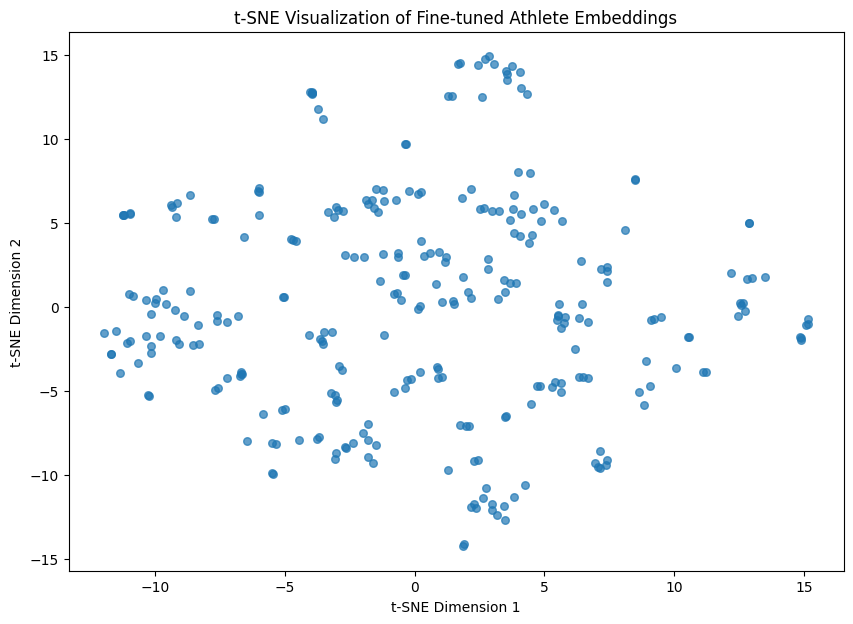

In [89]:
# Create a scatter plot of the 2D embeddings
plt.figure(figsize=(10, 7))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s=30, alpha=0.7)

# Optionally, add labels or a color scheme if you have categories (e.g., sport type)
plt.title("t-SNE Visualization of Fine-tuned Athlete Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


In [90]:
from sklearn.cluster import KMeans

# Define the number of clusters
n_clusters = 5  # You can adjust this based on your data and visualization

# Initialize and fit K-Means on the 2D embeddings
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings_2d)

# Add the cluster labels to your data for easy analysis
athletes_data['Cluster'] = cluster_labels


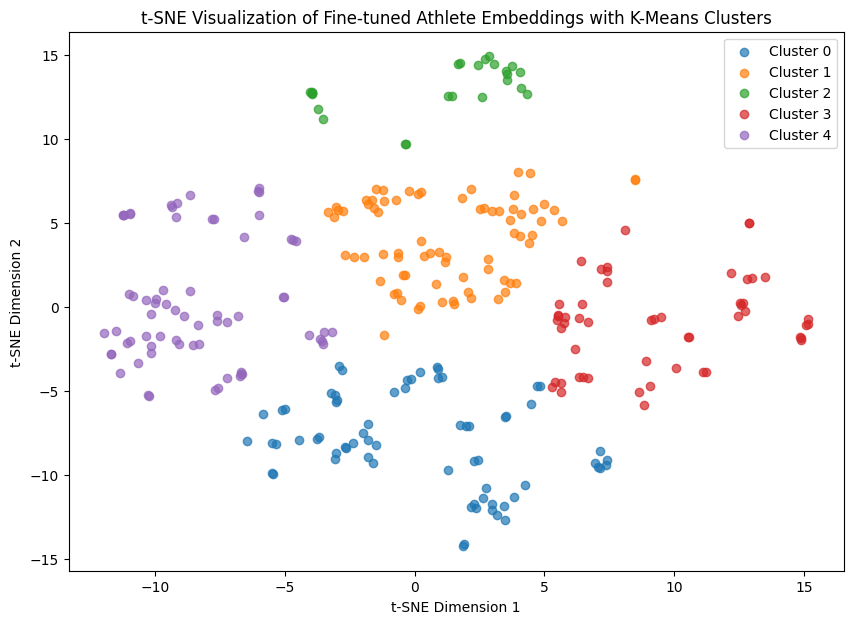

In [91]:
import matplotlib.pyplot as plt

# Create a scatter plot with clusters
plt.figure(figsize=(10, 7))
for cluster in range(n_clusters):
    # Filter data points for the current cluster
    cluster_points = embeddings_2d[athletes_data['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', alpha=0.7)

plt.legend(loc='best')
plt.title("t-SNE Visualization of Fine-tuned Athlete Embeddings with K-Means Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Increase max_features to get more keywords per cluster
vectorizer = TfidfVectorizer(stop_words='english', max_features=20)

# Extract and display top keywords for each cluster
for cluster in range(n_clusters):
    cluster_texts = athletes_data[athletes_data['Cluster'] == cluster]['combined_text']
    tfidf_matrix = vectorizer.fit_transform(cluster_texts)
    top_keywords = vectorizer.get_feature_names_out()
    print(f"\nCluster {cluster} Top Keywords: {top_keywords}")




Cluster 0 Top Keywords: ['2021' '2022' '2023' '2024' 'birth' 'bra' 'brazil' 'event' 'freestyle'
 'games' 'individual' 'location' 'medallist' 'mens' 'olympic' 'rank'
 'relay' 'womens' 'world' 'year']

Cluster 1 Top Keywords: ['2022' '2023' 'age' 'athlete' 'birth' 'bra' 'brazil' 'club' 'country'
 'event' 'events' 'location' 'national' 'olympic' 'rank' 'team'
 'volleyball' 'women' 'world' 'year']

Cluster 2 Top Keywords: ['2021' '2022' '2023' '2024' 'athlete' 'bra' 'brazil' 'event' 'gymnastics'
 'judo' 'kg' 'location' 'medallist' 'mens' 'qualifications' 'rank' 'team'
 'womens' 'world' 'year']

Cluster 3 Top Keywords: ['2022' '2023' 'age' 'athlete' 'birth' 'bra' 'brazil' 'canoe' 'country'
 'event' 'events' 'games' 'mens' 'olympic' 'place' 'rank' 'single'
 'womens' 'world' 'year']

Cluster 4 Top Keywords: ['2021' '2022' '2023' 'age' 'american' 'athlete' 'athletics' 'birth' 'bra'
 'brazil' 'championships' 'event' 'events' 'games' 'individual' 'olympic'
 'rank' 'womens' 'world' 'year']


In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Increase max_features to get more keywords per cluster
vectorizer = TfidfVectorizer(stop_words='english', max_features=20)

# Extract and display top keywords for each cluster
for cluster in range(n_clusters):
    cluster_texts = athletes_data[athletes_data['Cluster'] == cluster]['MainContent']
    tfidf_matrix = vectorizer.fit_transform(cluster_texts)
    top_keywords = vectorizer.get_feature_names_out()
    print(f"\nCluster {cluster} Top Keywords: {top_keywords}")


Cluster 0 Top Keywords: ['age' 'athlete' 'birth' 'brazil' 'country' 'date' 'female' 'function'
 'gender' 'janeiro' 'male' 'paulo' 'place' 'residence' 'rio' 'sailing'
 'sao' 'skateboarding' 'swimming' 'table']

Cluster 1 Top Keywords: ['age' 'athlete' 'beach' 'birth' 'brazil' 'country' 'date' 'female'
 'football' 'ft' 'function' 'gender' 'handball' 'height' 'male' 'place'
 'residence' 'sao' 'spain' 'volleyball']

Cluster 2 Top Keywords: ['age' 'artistic' 'athlete' 'birth' 'brazil' 'country' 'date' 'female'
 'function' 'gender' 'gymnastics' 'janeiro' 'judo' 'male' 'place' 'porto'
 'residence' 'rio' 'sao' 'taekwondo']

Cluster 3 Top Keywords: ['age' 'athlete' 'athletics' 'basketball' 'birth' 'boxing' 'brazil'
 'canoe' 'country' 'date' 'female' 'ft' 'function' 'gender' 'height'
 'male' 'place' 'residence' 'sao' 'surfing']

Cluster 4 Top Keywords: ['age' 'athlete' 'athletics' 'birth' 'brazil' 'country' 'date'
 'equestrian' 'female' 'ft' 'function' 'gender' 'height' 'male' 'paulo'
 'place' 

C:\Users\Rafael\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\Rafael\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


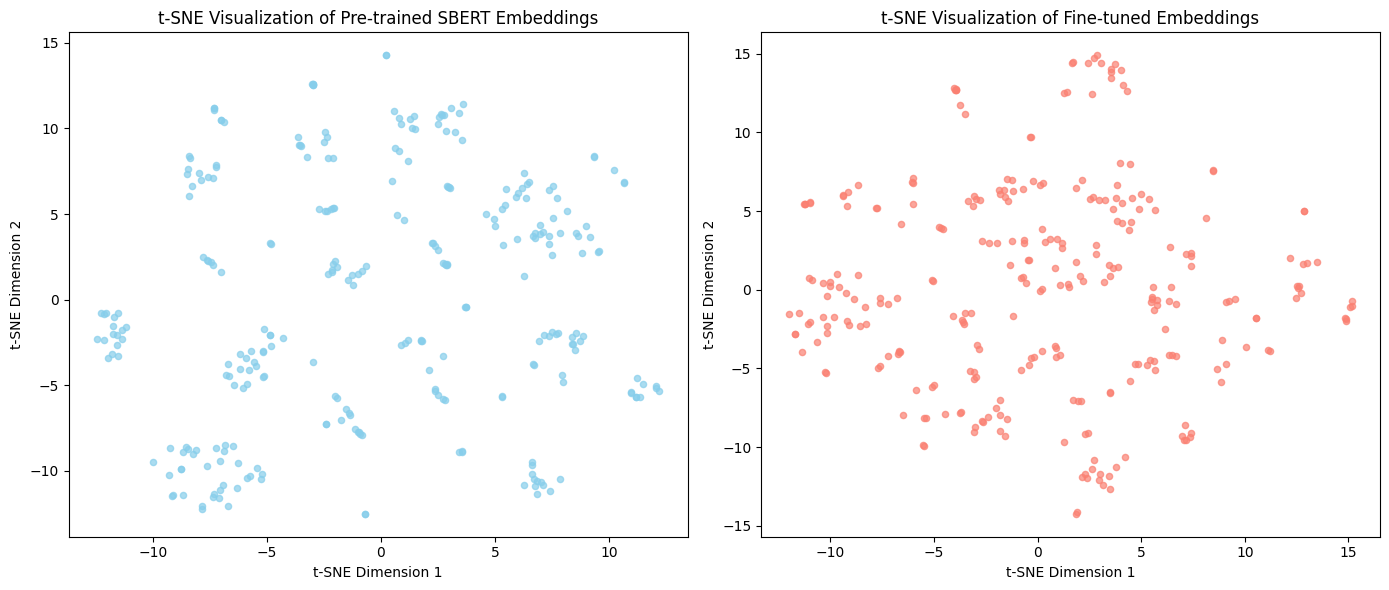

In [94]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming `embeddings` contains pre-trained SBERT embeddings
# and `fine_tuned_embeddings` contains embeddings after fine-tuning

# Step 1: Generate 2D t-SNE embeddings
pretrained_tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42).fit_transform(embeddings)
tuned_tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42).fit_transform(fine_tuned_embeddings)

# Step 2: Visualize both embeddings
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot pre-trained embeddings
ax[0].scatter(pretrained_tsne[:, 0], pretrained_tsne[:, 1], s=20, alpha=0.7, color='skyblue')
ax[0].set_title("t-SNE Visualization of Pre-trained SBERT Embeddings")
ax[0].set_xlabel("t-SNE Dimension 1")
ax[0].set_ylabel("t-SNE Dimension 2")

# Plot fine-tuned embeddings
ax[1].scatter(tuned_tsne[:, 0], tuned_tsne[:, 1], s=20, alpha=0.7, color='salmon')
ax[1].set_title("t-SNE Visualization of Fine-tuned Embeddings")
ax[1].set_xlabel("t-SNE Dimension 1")
ax[1].set_ylabel("t-SNE Dimension 2")

plt.tight_layout()
plt.show()



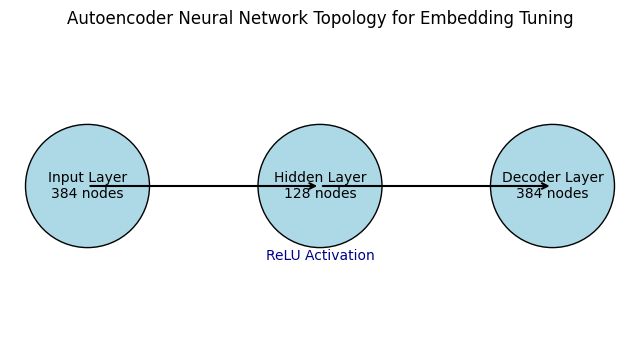

In [95]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define the figure and axis
fig, ax = plt.subplots(figsize=(8, 4))

# Define layer positions and sizes
layers = [
    {"name": "Input Layer", "size": 384, "position": (1, 2)},
    {"name": "Hidden Layer", "size": 128, "position": (4, 2)},
    {"name": "Decoder Layer", "size": 384, "position": (7, 2)}
]

# Draw layers as circles
for layer in layers:
    ax.add_patch(mpatches.Circle(layer["position"], 0.8, edgecolor="black", facecolor="lightblue"))
    ax.text(*layer["position"], f'{layer["name"]}\n{layer["size"]} nodes', ha='center', va='center', fontsize=10)

# Draw arrows to indicate flow
for i in range(len(layers) - 1):
    ax.annotate('', xy=layers[i + 1]["position"], xytext=layers[i]["position"],
                arrowprops=dict(arrowstyle="->", lw=1.5))

# Label activation function for the hidden layer
ax.text(4, 1.1, "ReLU Activation", ha='center', va='center', fontsize=10, color="darkblue")

# Set plot limits and remove axes
ax.set_xlim(0, 8)
ax.set_ylim(0, 4)
ax.axis('off')

# Title and display
plt.title("Autoencoder Neural Network Topology for Embedding Tuning")
plt.show()
